# Assignment Lab 02: Nonlinear Regression and Overfitting

### Name: Pranisaa Charnparttaravanit
### ID: st121720

This assignment illustrates how nonlinear regression analysis is performed on a data set called "CarPrice_Assignment". This data set includes 2 independent variable x-es (engine size and horse power) and a dependent y (price).

The followings will include brief explations of the steps of the analysis, 3D plots as well as an evaluation of the results.

In [311]:
# Hypothesis function

def h(X, theta):
    return X.dot(theta)

# Solve the normal equations

def regress(X, y):
    cov = np.dot(X.T, X)
    cov_inv = np.linalg.inv(cov)
    theta = np.dot(cov_inv, np.dot(X.T, y))
    return theta

# RMSE (root mean squared error) metric for prediction accuracy

def rmse(y, y_pred):
    return np.sqrt(np.dot((y - y_pred).T, y - y_pred) / m)


In [312]:
# Plot X, y, and the two regression models

def get_predictions(x, theta):
    x = np.array([x]).T
    x = np.insert(x, 0, 1, axis=1)
    while(x.shape[1] < theta.shape[0]):
        x = np.insert(x, x.shape[1], x[:,1] * x[:,-1], axis=1)
    y = h(x, theta)
    return y

In [313]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

## Import data set

## Normalize x values

In [315]:
x_mean=np.mean(X_12, axis = 0)
x_sd=np.std(X_12, axis = 0)
X = (X_12-x_mean)/x_sd
# print(X[:5,:])

# y_mean = np.mean(y,axis =0)
# y_std = np.std(y,axis = 0)
# y = (y-y_mean)/y_std
# print(y[:5])

## Plot

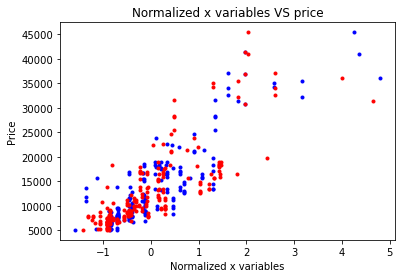

In [316]:
plt.plot(X[:,0], y, 'b.',label = 'enginesize')
plt.plot(X[:,1], y, 'r.',label = 'horsepower')
plt.xlabel('Normalized x variables')
plt.ylabel('Price')
plt.title('Normalized x variables VS price')
plt.show()

## Partion data into training and test datasets

In [317]:
idx = np.arange(0,m1)
# print(idx)
#print(X)
random.shuffle(idx)    #must shuffle! because we dont know how data are arranged. Maybe in particular order, therefore we must shuffle them before splitting them into training set and testing set
#uniform sampling without repeating, MIDTERM EXAM 

percent_train = .6
m_train = int(m1 * percent_train)
#print(m_train)
train_idx = idx[0:m_train]
#print(train_idx)
test_idx = idx[m_train:m1+1]
X_train = X[train_idx,0:y_index];
# print(y_index)
X_test = X[test_idx,0:y_index];
# print(X_train.shape)
# print(X_test)

y_train = data[train_idx,y_index];
y_test = data[test_idx,y_index];
# print(y_train.shape)
# print(y_test)

## Cost function

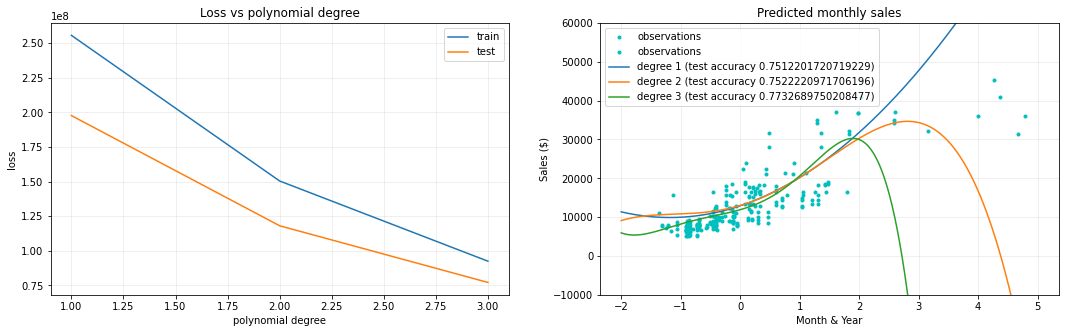

In [318]:
# Cost function normalized by number of examples

def J(theta,X,y):
    return 1 / 2 / X.shape[1] * (h(X,theta)-y).T.dot(h(X,theta)-y)

# Get design matrix for polynomial model of degree d

def x_polynomial(x, d):
    a = np.ones((x.shape[0], 1))    #first psition of shape -> no. row
    for i in range(d):
        a = np.concatenate((a,x**(i+1)), axis = 1)
    return a

# Build models of degree 1 to max_degree

max_degree = 3

J_train = np.zeros(max_degree)
J_test = np.zeros(max_degree)

# Initalize plots for predictions and loss

fig, ax = plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(20)
fig.subplots_adjust(left=.2, bottom=None, right=None, top=None, wspace=.2, hspace=.2)
plt1 = plt.subplot(1,2,1)
plt2 = plt.subplot(1,2,2)
plt2.plot(X_train, y_train, 'c.', label='observations')

theta_all=[]
# print(X_train[:5], X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
for i in range(1, max_degree+1):

    # Fit model on training data and get cost for training and test data
    
    Xi_train = x_polynomial(X_train, i)    
    Xi_test = x_polynomial(X_test, i);

    theta = regress(Xi_train, y_train)
    theta_all.append(theta)
    J_train[i-1] = J(theta, Xi_train, y_train)
    y_pred_test = h(Xi_test, theta)
    J_test[i-1] = J(theta, Xi_test, y_test)
    
    # Plot

    x_series = np.linspace(-2, 5, 1000)
    y_series = get_predictions(x_series, theta)
    plt2.plot(x_series, y_series, '-', label='degree ' + str(i) + ' (test accuracy ' + str(r_squared(y_test, y_pred_test)) + ')')

plt1.plot(np.arange(1, max_degree + 1, 1), J_train, '-', label='train')
plt1.plot(np.arange(1, max_degree + 1, 1), J_test, '-', label='test')
plt1.set_title('Loss vs polynomial degree')
plt1.set_xlabel('polynomial degree')
plt1.set_ylabel('loss')
plt1.grid(axis='both', alpha=.25)
plt1.legend()

plt.ylim(-10000, 60000)
# plt.xlim(-2, 2)
plt2.set_title('Predicted monthly sales')
plt2.set_xlabel('Month & Year')
plt2.set_ylabel('Sales ($)')
plt2.grid(axis='both', alpha=.25)
plt2.legend()
plt.show()
# print(theta_all)

## Linear

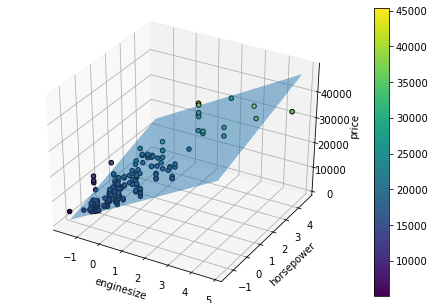

In [319]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,0],X[:,1],data[:,y_index],edgecolors='black',c=data[:,y_index],alpha=1)
ax.set_xlabel('enginesize')
ax.set_ylabel('horsepower')
ax.set_zlabel('price')

X1 = np.linspace(min(X[:,0]), max(X[:,0]), len(y))
X2 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))

xx1,xx2 = np.meshgrid(X1,X2)
# print(theta_all[0])
yy = (theta_all[0][0] + theta_all[0][1]*xx1 + theta_all[0][2]*xx2)
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=35, azim=-60)
plt.colorbar(p)
plt.show()


## Degree 2

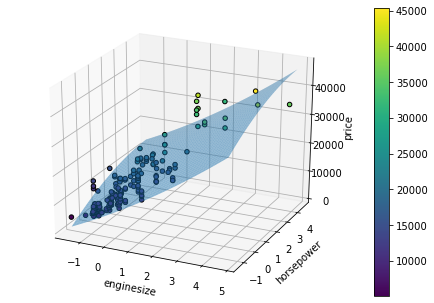

In [320]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,0],X[:,1],data[:,y_index],edgecolors='black',c=data[:,y_index],alpha=1)
ax.set_xlabel('enginesize')
ax.set_ylabel('horsepower')
ax.set_zlabel('price')

X1 = np.linspace(min(X[:,0]), max(X[:,0]), len(y))
X2 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))

xx1,xx2 = np.meshgrid(X1,X2)
# print(theta_all[1])
yy = (theta_all[1][0] + theta_all[1][1]*xx1 + theta_all[1][2]*xx2 + theta_all[1][3]*(xx1**2) +theta_all[1][4]*(xx2**2))
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=25, azim=-65)
plt.colorbar(p)
plt.show()

## Degree 3

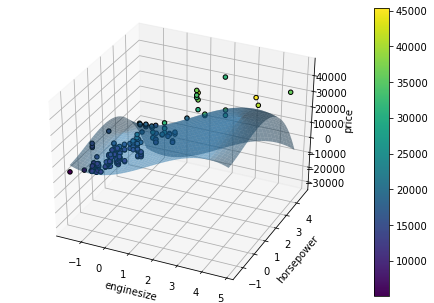

In [321]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
p = ax.scatter(X[:,0],X[:,1],data[:,y_index],edgecolors='black',c=data[:,y_index],alpha=1)
ax.set_xlabel('enginesize')
ax.set_ylabel('horsepower')
ax.set_zlabel('price')

X1 = np.linspace(min(X[:,0]), max(X[:,0]), len(y))
X2 = np.linspace(min(X[:,1]), max(X[:,1]), len(y))

xx1,xx2 = np.meshgrid(X1,X2)
yy = (theta_all[2][0] + theta_all[2][1]*xx1 + theta_all[2][2]*xx2 + theta_all[2][3]*(xx1**2) +theta_all[2][4]*(xx2**2)+theta_all[2][5]*(xx1**3)+theta_all[2][5]*(xx2**3))
ax.plot_surface(xx1,xx2,yy, alpha=0.5)
ax.view_init(elev=35, azim=-65)
plt.colorbar(p)
plt.show()

## Analysis and Evaluation

As shown above, r square improves as the degree of polynomial regression model increases and it shows no sign of overfitting.

linear regression model has an r square of 0.7512
2 degree polynomial model has an r square of 0.7522
3 degree polynomial model has an r square of 0.7732